In [4]:
from scipy import stats

In [4]:
stats.norm.cdf(70,60,10)
#70=X is less than,mean=60,std.d=10
#there is 84 % chnace of getting less than 70%

0.8413447460685429

In [7]:
#less than 55%
stats.norm.cdf(55,60,10)

0.3085375387259869

In [9]:
#to calculate greaterthan 80
1-stats.norm.cdf(80,60,10)

0.02275013194817921

In [10]:
#greater than 2%
1-stats.norm.cdf(2,60,10)

0.999999996684254

In [11]:
#X<=680,mean=711,std.d=29
stats.norm.cdf(680,711,29)

0.14254260383881612

In [13]:
#x>680
1-stats.norm.cdf(700,711,29)

0.6477712907082059

In [16]:
#697<=X<=740
stats.norm.cdf(697,711,29)

0.31463356742704107

In [17]:
stats.norm.cdf(740,711,29)

0.8413447460685429

In [18]:
0.8413447460685429-0.31463356742704107

0.5267111786415019

In [8]:
#GLAXO
#2% loss or higher
#loss means is negative side
stats.norm.cdf(-0.02,0.0004,0.0134)

0.06395593743937553

In [9]:
#gain means is positive side so you should use 1-(....)
1-stats.norm.cdf(0.02,0.0004,0.0134)

0.07177658173190637

In [10]:
#BEML
#2% loss or higher
stats.norm.cdf(-0.02,0.0003,0.0264)

0.22096464496279805

In [11]:
#2% gain or higher
1-stats.norm.cdf(0.02,0.0003,0.0264)

0.2277696435431158

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
# from google.collab import files
# uploaded = files.upload()
beml_df = pd.read_csv('BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
# from google.collab import files
# uploaded = files.upload()
glaxo_df = pd.read_csv('GLAXO.csv')
glaxo_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [6]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [7]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [8]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [9]:
# The DataFrames have a date column, so we can
# create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
# ascending order.
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date'])).drop('Date',axis=1)
glaxo_df

,Close
Date,
2010-01-04,1625.65
2010-01-05,1616.80
2010-01-06,1638.50
2010-01-07,1648.70
2010-01-08,1639.80
...,...
2016-12-26,2723.50
2016-12-27,2701.75
2016-12-28,2702.15


In [96]:
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date'])).drop('Date',axis=1)
beml_df

,Close
Date,
2010-01-04,1135.60
2010-01-05,1134.60
2010-01-06,1139.60
2010-01-07,1144.15
2010-01-08,1144.05
...,...
2016-12-26,950.25
2016-12-27,975.70
2016-12-28,974.40


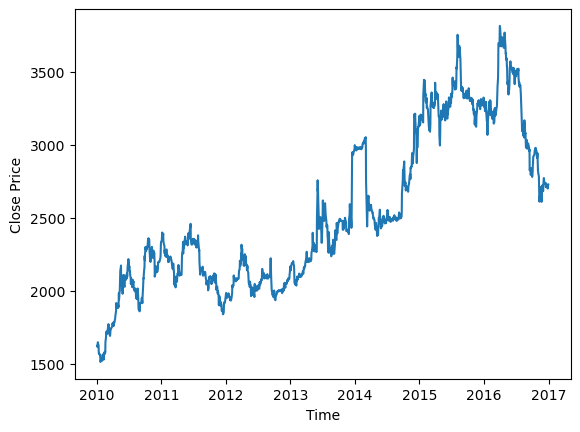

In [97]:
import matplotlib.pyplot as plt
import seaborn as sn  #or sns
%matplotlib inline
plt.plot(glaxo_df.Close); #in pandas we need to use glaxo_df['Close'] but in seaborn as well as matplotlib.pyplot we don't need to use like that
plt.xlabel('Time');
plt.ylabel('Close Price'); #why here put ';' for the out put would be clean like no extra line would not br come

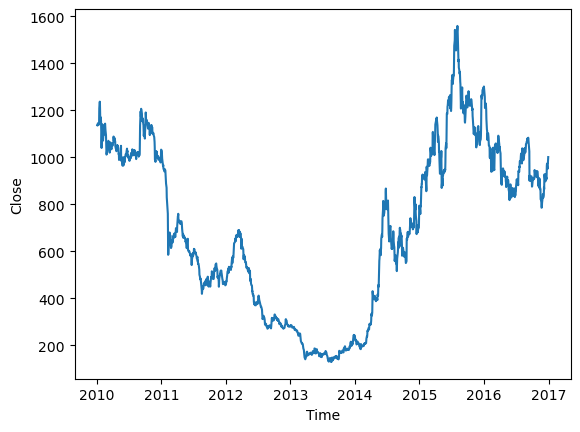

In [98]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [99]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1) #pct_change = percentage change ,period = 1 means i want the percentage change with 1 before value(eg:1616.80 &1625.56),if i want 1(eg:1638.50&1625.65)put period=2 that is percentage change of before before value
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [100]:
glaxo_df

,Close,gain
Date,,
2010-01-04,1625.65,NaN
2010-01-05,1616.80,-0.005444
2010-01-06,1638.50,0.013422
2010-01-07,1648.70,0.006225
2010-01-08,1639.80,-0.005398
...,...,...
2016-12-26,2723.50,-0.001283
2016-12-27,2701.75,-0.007986
2016-12-28,2702.15,0.000148


In [101]:
glaxo_df = glaxo_df.dropna()
glaxo_df

,Close,gain
Date,,
2010-01-05,1616.80,-0.005444
2010-01-06,1638.50,0.013422
2010-01-07,1648.70,0.006225
2010-01-08,1639.80,-0.005398
2010-01-11,1629.45,-0.006312
...,...,...
2016-12-26,2723.50,-0.001283
2016-12-27,2701.75,-0.007986
2016-12-28,2702.15,0.000148


In [102]:
glaxo_df['gain2'] = glaxo_df.Close.pct_change(periods = 2)
glaxo_df
#why 2NaN value here is period 2? there is no before before values

,Close,gain,gain2
Date,,,
2010-01-05,1616.80,-0.005444,NaN
2010-01-06,1638.50,0.013422,NaN
2010-01-07,1648.70,0.006225,0.019730
2010-01-08,1639.80,-0.005398,0.000793
2010-01-11,1629.45,-0.006312,-0.011676
...,...,...,...
2016-12-26,2723.50,-0.001283,0.003685
2016-12-27,2701.75,-0.007986,-0.009259
2016-12-28,2702.15,0.000148,-0.007839


In [68]:
beml_df

,Close,gain
Date,,
2010-01-04,1135.60,NaN
2010-01-05,1134.60,-0.000881
2010-01-06,1139.60,0.004407
2010-01-07,1144.15,0.003993
2010-01-08,1144.05,-0.000087
...,...,...
2016-12-26,950.25,-0.021924
2016-12-27,975.70,0.026782
2016-12-28,974.40,-0.001332


In [69]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [70]:
glaxo_df

,Close,gain
Date,,
2010-01-05,1616.80,-0.005444
2010-01-06,1638.50,0.013422
2010-01-07,1648.70,0.006225
2010-01-08,1639.80,-0.005398
2010-01-11,1629.45,-0.006312
...,...,...
2016-12-26,2723.50,-0.001283
2016-12-27,2701.75,-0.007986
2016-12-28,2702.15,0.000148


In [71]:
beml_df

,Close,gain
Date,,
2010-01-05,1134.60,-0.000881
2010-01-06,1139.60,0.004407
2010-01-07,1144.15,0.003993
2010-01-08,1144.05,-0.000087
2010-01-11,1137.00,-0.006162
...,...,...
2016-12-26,950.25,-0.021924
2016-12-27,975.70,0.026782
2016-12-28,974.40,-0.001332


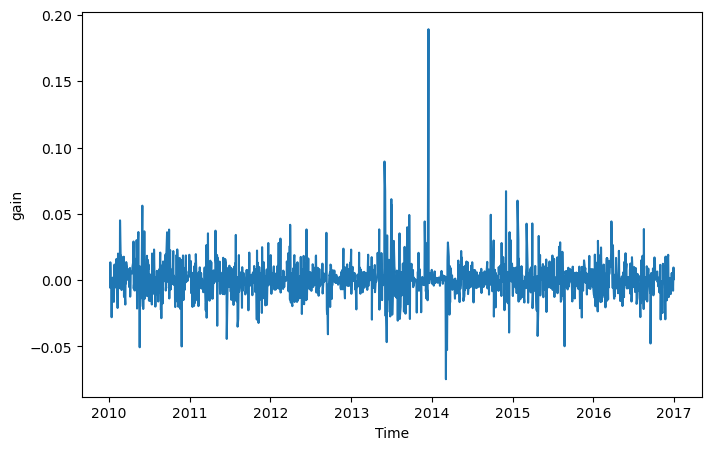

In [72]:
#plot the gains
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5));
plt.plot(glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

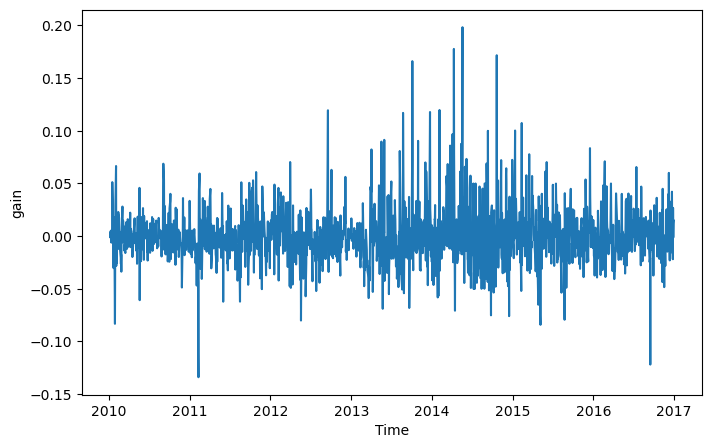

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5));
plt.plot(beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

In [77]:
import seaborn as sn

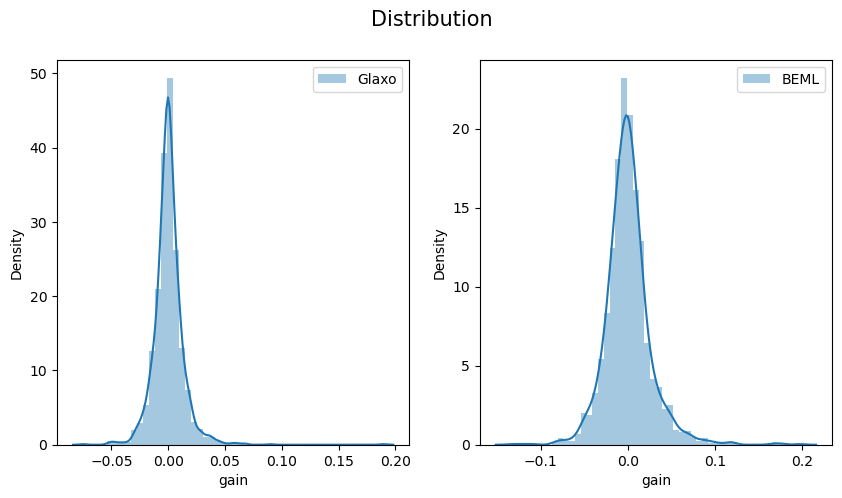

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('Distribution',fontsize=15)

sn.distplot(glaxo_df.gain, label = 'Glaxo');

plt.xlabel('gain')
plt.ylabel('Density');
plt.legend();

plt.subplot(1,2,2)
sn.distplot(beml_df.gain, label = 'BEML');

plt.xlabel('gain')
plt.ylabel('Density');
plt.legend();